# TP2 : Gestion des maillages

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Table des matières 
1. [Exercice 1](#part1)
2. [Exercice 2](#part2)
3. [Exercice 3](#part3)

## Exercice 1<a id="part1"></a>

> **Question1.** Définition de la routine `PrintFile`.

In [2]:
def PrintFile(nom_du_fichier) : 
    f = open(nom_du_fichier, 'r') # r = read 
    print(f.read())
    f.close() 

In [4]:
PrintFile('maillage1.msh')

$Noeuds
12
0 0.0 0.0 
1 1.0 0.0 
2 2.0 0.0 
3 3.0 0.0 
4 0.0 1.0 
5 1.0 1.0 
6 2.0 1.0 
7 3.0 1.0 
8 0.0 2.0 
9 1.0 2.0 
10 2.0 2.0 
11 3.0 2.0 
$FinNoeuds
$Elements
12
0 0 1 5
1 0 5 4
2 1 2 6
3 1 6 5
4 2 3 7
5 2 7 6
6 4 5 9
7 4 9 8
8 5 6 10
9 5 10 9
10 6 7 11
11 6 11 10
$FinElements



> **Question2.** Définition de la routine `LoadVTX`. 

In [6]:
def LoadVTX(nom_du_fichier) : 
    f = open(nom_du_fichier, 'r')
    f.readline() #On lit '$Noeuds', que l'on ignore. 
    nbr_vtx = int(f.readline()) #Conversion str -> int
    resultat = []
    for i in range(nbr_vtx) : 
        ligne = f.readline()
        tableau = ligne.split()
        couple = []
        couple.append(float(tableau[1])) #Conversion str -> float
        couple.append(float(tableau[2]))
        resultat.append(couple)
    f.close()
    return resultat 

In [7]:
LoadVTX('maillage1.msh')

[[0.0, 0.0],
 [1.0, 0.0],
 [2.0, 0.0],
 [3.0, 0.0],
 [0.0, 1.0],
 [1.0, 1.0],
 [2.0, 1.0],
 [3.0, 1.0],
 [0.0, 2.0],
 [1.0, 2.0],
 [2.0, 2.0],
 [3.0, 2.0]]

> **Question3.** Définition de la routine `LoadELT`. 

In [10]:
def LoadELT(nom_du_fichier) : 
    f = open(nom_du_fichier, 'r') 
    f.readline() #On lit '$Noeuds', que l'on ignore. 
    nbr_vtx = int(f.readline()) #Conversion str -> int
    for i in range(nbr_vtx + 2) : #Lecture des vtx puis de '$FinNoeuds', '$Elements'.
        f.readline()
    nbr_elt = int(f.readline())
    resultat = []
    for i in range(nbr_elt) :
        ligne = f.readline()
        tableau = ligne.split() 
        triplet = []
        triplet.append(int(tableau[1])) #Conversion str -> int
        triplet.append(int(tableau[2]))
        triplet.append(int(tableau[3]))
        resultat.append(triplet)
    f.close()
    return resultat 

In [11]:
LoadELT('maillage1.msh')

[[0, 1, 5],
 [0, 5, 4],
 [1, 2, 6],
 [1, 6, 5],
 [2, 3, 7],
 [2, 7, 6],
 [4, 5, 9],
 [4, 9, 8],
 [5, 6, 10],
 [5, 10, 9],
 [6, 7, 11],
 [6, 11, 10]]

## Exercice 2<a id="part2"></a> 


L'idée de cet algorithme est la suivante : 
1) Création des sommets. On parcourt le rectangle de gauche à droite et de bas en haut. À chaque pas de la subdivision horizontale on ajoute à `vtx` un nouveau point, tout en étant vigilant d'être encore à l'intérieur du rectangle. 
2) Création des cellules. On parcourt toujours le rectangle de gauche à droite et de bas en haut. À chaque tour de boucle, on va ajouter deux triangles à `elt`, l'un supérieur et l'autre inférieur.  

In [14]:
def GenerateMesh(nom_du_fichier, Lx, Ly, Nx, Ny):
    f = open(nom_du_fichier, 'w')
    f.write("$Noeuds\n")
    vtx = [] #Liste vide visant à contenir les sommets du maillage.
    elt = [] #Liste vide visant à contenir les cellules du maillage. 
    Nv = (Nx+1) * (Ny+1) #Cas particulier des maillages sur un rectangle 
    Ne = 2 * Nx * Ny 
    f.write(str(Nv)+"\n")
    
    hx = Lx/Nx #Pas de la subdivision sur l'axe des abscisses. 
    hy = Ly/Ny #Pas de la subdivision sur l'axe des ordonnées. 
    x = 0. 
    y = 0.
    noeuds = 0
    kx = 0
    while noeuds < Nv:
        vtx.append([x,y])
        f.write("{} {} {}\n".format(noeuds,x,y))
        
        if kx==Nx:
            x=0.
            kx=0
            y+=hy
            
        else:
            x+=hx
            kx+=1
            
        noeuds+=1

    index = 0 
    f.write("$FinNoeuds\n")
    f.write("$Elements\n")
    f.write(str(Ne)+"\n")
    for j in range(Ny):
        for i in range(Nx):
            s0 = j*(Nx+1) + i
            s1 = j*(Nx+1) + i+1
            s2 = (j+1) * (Nx+1) + i+1
            elt.append( [ s0, s1, s2 ] ) #Triangle inférieur (en dessous de la diagonale).
            f.write("{} {} {} {}\n".format(index, s0, s1, s2))
            index +=1 

            s0 = j*(Nx+1) + i 
            s1 = (j+1) * (Nx+1) + i+1 
            s2 = (j+1) * (Nx+1) + i
            elt.append( [ s0, s1, s2] ) #Triangle supérieur.
            f.write("{} {} {} {}\n".format(index, s0, s1, s2))
            index +=1
    f.write("$FinElements")    
    f.close()


In [16]:
GenerateMesh('maillage_test.txt', 3,2,3,2)
PrintFile('maillage_test.txt') #Identique à maillage1.msh 

$Noeuds
12
0 0.0 0.0
1 1.0 0.0
2 2.0 0.0
3 3.0 0.0
4 0.0 1.0
5 1.0 1.0
6 2.0 1.0
7 3.0 1.0
8 0.0 2.0
9 1.0 2.0
10 2.0 2.0
11 3.0 2.0
$FinNoeuds
$Elements
12
0 0 1 5
1 0 5 4
2 1 2 6
3 1 6 5
4 2 3 7
5 2 7 6
6 4 5 9
7 4 9 8
8 5 6 10
9 5 10 9
10 6 7 11
11 6 11 10
$FinElements


## Exercice 3<a id="part2"></a> 


>**Question 1.** Définition de la routine `PlotMesh`. 

In [25]:
def PlotMesh(vtx,elt) : 
    X = [vtx[i][0] for i in range(len(vtx))]
    Y = [vtx[j][1] for j in range(len(vtx))]
    plt.triplot(X,Y,elt)
    nb_elements = len(elt)
    plt.title(fr"Maillage à ${nb_elements}$ éléments.")
    plt.axis('equal')

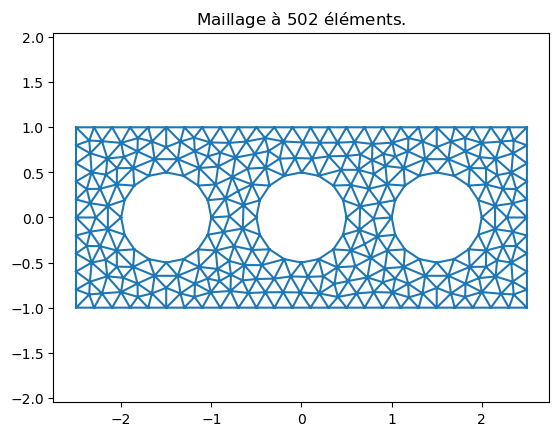

In [26]:
vtx = LoadVTX('maillage5.msh')
elt = LoadELT('maillage5.msh')
PlotMesh(vtx,elt)

>**Question 2.** Définition de la routine `PlotMesh_surcharged`. 

In [45]:
def PlotMesh_surcharged(vtx, elt, val = None):
    if val is None:
        val = np.zeros(len(vtx))
    
    X = [vtx[i][0] for i in range(len(vtx))]
    Y = [vtx[j][1] for j in range(len(vtx))]
    plt.tripcolor(X, Y, val, triangles=elt)
    nb_elements = len(elt)
    plt.title(fr"Maillage à {nb_elements} éléments.")
    plt.axis('equal')
    plt.colorbar(label='Valeur')
    plt.show()

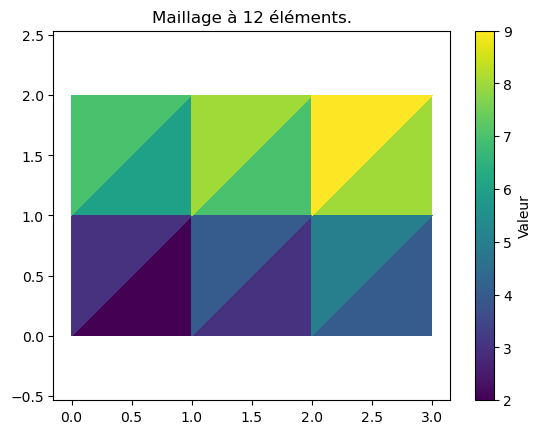

In [48]:
vtx = LoadVTX('maillage1.msh')
elt = LoadELT('maillage1.msh')
val=[0,1,2,3,4,5,6,7,8,9,10,11]
PlotMesh_surcharged(vtx,elt,val)

> **Question 3.**

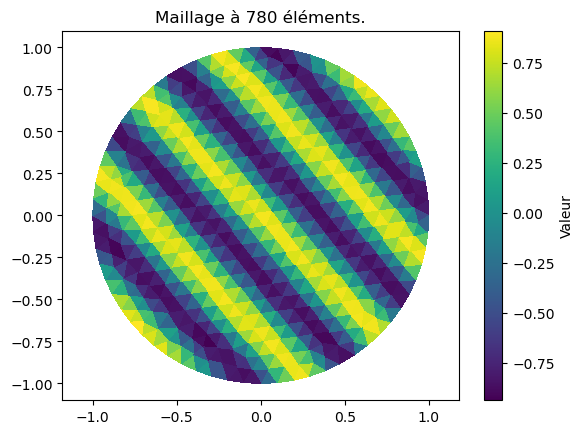

In [50]:
vtx = LoadVTX('maillage2.msh')
elt = LoadELT('maillage2.msh')

d = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

x = np.array(vtx)

f_values=np.cos(4*np.pi*np.dot(x,d))

PlotMesh_surcharged(vtx,elt,f_values)